In [2]:
import numpy as np
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

from numpy.random import seed
seed(123)

2024-06-05 17:21:46.956364: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 17:21:48.119231: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.16.1


# Zad
Porównaj wyniki działań różnych optymalizacji
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
```
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
```
* 
```python
RMSprop = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
```
* 
```python
Adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
```
* 
```python
Adadelta = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```

https://keras.io/optimizers/

In [3]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/tmp/ipykernel_19420/1853370235.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('adult/adult.data', sep=", ",header = None)
/tmp/ipykernel_19420/1853370235.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:




dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

(30162, 41)


(15060, 41)

# SGD

In [6]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

/home/sit3kk/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-05 17:22:23.616233: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-05 17:22:23.665217: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-p

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,771 (38.17 KB)

 Trainable params: 9,771 (38.17 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
sgd = tf.keras.optimizers.legacy.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

/Users/apple/Projects/UJ_zajecia/venvp/lib/python3.8/site-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_sgd])

Epoch 1/100
943/943 [==============================] - 2s 2ms/step - loss: 0.5313 - accuracy: 0.7496 - val_loss: 0.4168 - val_accuracy: 0.7866
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3576 - accuracy: 0.8309 - val_loss: 0.3414 - val_accuracy: 0.8402
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3388 - accuracy: 0.8392 - val_loss: 0.3345 - val_accuracy: 0.8452
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3334 - accuracy: 0.8434 - val_loss: 0.3310 - val_accuracy: 0.8465
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3299 - accuracy: 0.8449 - val_loss: 0.3287 - val_accuracy: 0.8479
Epoch 6/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3283 - accuracy: 0.8470 - val_loss: 0.3281 - val_accuracy: 0.8463
Epoch 7/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3280 - accuracy: 0.8459 - val_loss: 0.3270 - val_accuracy: 0.8489

In [8]:
history_sgd.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

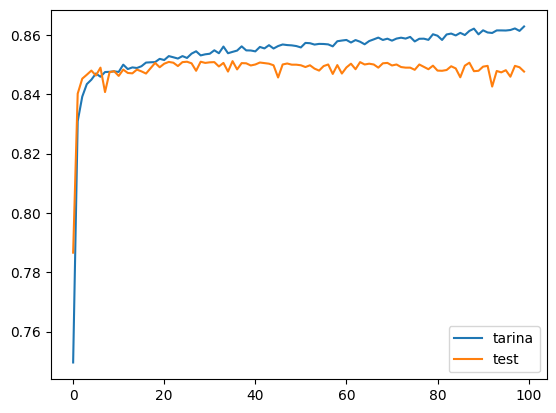

In [9]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

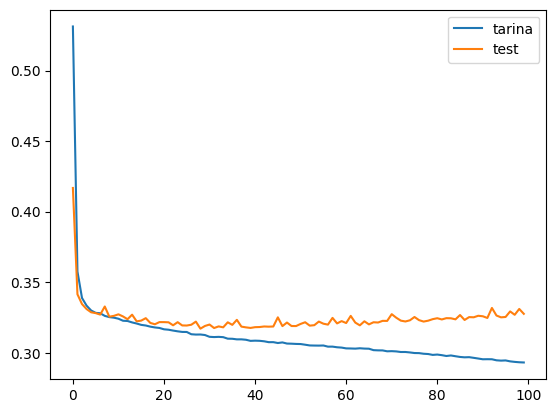

In [10]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['loss'], label = "tarina")
plt.plot(history_sgd.history['val_loss'], label = "test")
plt.legend()
plt.show()

# SGD

In [9]:
history_sgd_nesterov_false = History()
model_sgd_nesterov_false = Sequential([
    Dense(100, activation="sigmoid", input_shape=(X_train.shape[1],)),
    Dense(50, activation="sigmoid"),
    Dense(10, activation="sigmoid"),
    Dense(1, activation="sigmoid")
])
sgd_nesterov_false = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=False)
model_sgd_nesterov_false.compile(loss="binary_crossentropy", optimizer=sgd_nesterov_false, metrics=["accuracy"])
history_sgd_nesterov_false = model_sgd_nesterov_false.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)


history_sgd_nesterov_true = History()
model_sgd_nesterov_true = Sequential(
    [
        Dense(100, activation="sigmoid", input_shape=(X_train.shape[1],)),
        Dense(50, activation="sigmoid"),
        Dense(10, activation="sigmoid"),
        Dense(1, activation="sigmoid"),
    ]
)
sgd_nesterov_true = tf.keras.optimizers.SGD(
    learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True
)
model_sgd_nesterov_true.compile(
    loss="binary_crossentropy", optimizer=sgd_nesterov_true, metrics=["accuracy"]
)
history_sgd_nesterov_true = model_sgd_nesterov_true.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100
)

Epoch 1/100


/home/sit3kk/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/sit3kk/anaconda3/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


943/943 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7509 - loss: 0.5424 - val_accuracy: 0.8344 - val_loss: 0.3646
Epoch 2/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8368 - loss: 0.3495 - val_accuracy: 0.8420 - val_loss: 0.3408
Epoch 3/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8408 - loss: 0.3417 - val_accuracy: 0.8405 - val_loss: 0.3374
Epoch 4/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8440 - loss: 0.3321 - val_accuracy: 0.8451 - val_loss: 0.3318
Epoch 5/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8463 - loss: 0.3302 - val_accuracy: 0.8470 - val_loss: 0.3349
Epoch 6/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8460 - loss: 0.3280 - val_accuracy: 0.8468 - val_loss: 0.3299
Epoch 7/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8475 - loss: 0.3260 - val_accuracy: 0.8464 - val_loss: 0.3299
Epoch 8/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8425 - loss: 0.3301 - val_accuracy: 0.8469

# RMSprop

In [10]:
history_rmsprop = History()
model_rmsprop = Sequential(
    [
        Dense(100, activation="sigmoid", input_shape=(X_train.shape[1],)),
        Dense(50, activation="sigmoid"),
        Dense(10, activation="sigmoid"),
        Dense(1, activation="sigmoid"),
    ]
)
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
model_rmsprop.compile(
    loss="binary_crossentropy", optimizer=rmsprop, metrics=["accuracy"]
)
history_rmsprop = model_rmsprop.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100
)

Epoch 1/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7839 - loss: 0.4584 - val_accuracy: 0.8439 - val_loss: 0.3436
Epoch 2/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8466 - loss: 0.3385 - val_accuracy: 0.8450 - val_loss: 0.3393
Epoch 3/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8454 - loss: 0.3366 - val_accuracy: 0.8464 - val_loss: 0.3306
Epoch 4/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8521 - loss: 0.3223 - val_accuracy: 0.8475 - val_loss: 0.3278
Epoch 5/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8478 - loss: 0.3257 - val_accuracy: 0.8471 - val_loss: 0.3272
Epoch 6/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8471 - loss: 0.3248 - val_accuracy: 0.8452 - val_loss: 0.3320
Epoch 7/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8488 - loss: 0.3231 - val_accuracy: 0.8495 - val_loss: 0.3252
Epoch 8/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8494 - loss: 0.3211 - val_accu

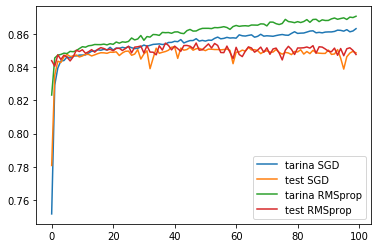

# Adagrad

In [11]:
history_adagrad = History()
model_adagrad = Sequential(
    [
        Dense(100, activation="sigmoid", input_shape=(X_train.shape[1],)),
        Dense(50, activation="sigmoid"),
        Dense(10, activation="sigmoid"),
        Dense(1, activation="sigmoid"),
    ]
)
adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model_adagrad.compile(
    loss="binary_crossentropy", optimizer=adagrad, metrics=["accuracy"]
)
history_adagrad = model_adagrad.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100
)

Epoch 1/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7510 - loss: 0.5655 - val_accuracy: 0.7543 - val_loss: 0.5518
Epoch 2/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7507 - loss: 0.5536 - val_accuracy: 0.7543 - val_loss: 0.5397
Epoch 3/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7522 - loss: 0.5347 - val_accuracy: 0.7543 - val_loss: 0.5027
Epoch 4/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7533 - loss: 0.4866 - val_accuracy: 0.7582 - val_loss: 0.4378
Epoch 5/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7726 - loss: 0.4243 - val_accuracy: 0.8268 - val_loss: 0.3921
Epoch 6/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8297 - loss: 0.3860 - val_accuracy: 0.8364 - val_loss: 0.3705
Epoch 7/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8366 - loss: 0.3671 - val_accuracy: 0.8353 - val_loss: 0.3605
Epoch 8/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8332 - loss: 0.3612 - val_accu

# Adadelta

In [12]:
history_adadelta = History()
model_adadelta = Sequential(
    [
        Dense(100, activation="sigmoid", input_shape=(X_train.shape[1],)),
        Dense(50, activation="sigmoid"),
        Dense(10, activation="sigmoid"),
        Dense(1, activation="sigmoid"),
    ]
)
adadelta = tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
model_adadelta.compile(
    loss="binary_crossentropy", optimizer=adadelta, metrics=["accuracy"]
)
history_adadelta = model_adadelta.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100
)

Epoch 1/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7793 - loss: 0.4639 - val_accuracy: 0.8428 - val_loss: 0.3501
Epoch 2/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8383 - loss: 0.3497 - val_accuracy: 0.8467 - val_loss: 0.3404
Epoch 3/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8399 - loss: 0.3384 - val_accuracy: 0.8468 - val_loss: 0.3327
Epoch 4/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8421 - loss: 0.3346 - val_accuracy: 0.8476 - val_loss: 0.3309
Epoch 5/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8477 - loss: 0.3268 - val_accuracy: 0.8489 - val_loss: 0.3270
Epoch 6/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8478 - loss: 0.3230 - val_accuracy: 0.8471 - val_loss: 0.3266
Epoch 7/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8442 - loss: 0.3245 - val_accuracy: 0.8461 - val_loss: 0.3315
Epoch 8/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8472 - loss: 0.3230 - val_accu

# Adam

In [13]:
history_adam_001 = History()
model_adam_001 = Sequential(
    [
        Dense(100, activation="sigmoid", input_shape=(X_train.shape[1],)),
        Dense(50, activation="sigmoid"),
        Dense(10, activation="sigmoid"),
        Dense(1, activation="sigmoid"),
    ]
)
adam_001 = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False
)
model_adam_001.compile(
    loss="binary_crossentropy", optimizer=adam_001, metrics=["accuracy"]
)
history_adam_001 = model_adam_001.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100
)

Epoch 1/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7620 - loss: 0.4844 - val_accuracy: 0.8444 - val_loss: 0.3519
Epoch 2/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8433 - loss: 0.3459 - val_accuracy: 0.8317 - val_loss: 0.3488
Epoch 3/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8498 - loss: 0.3303 - val_accuracy: 0.8469 - val_loss: 0.3288
Epoch 4/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8500 - loss: 0.3226 - val_accuracy: 0.8487 - val_loss: 0.3260
Epoch 5/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8498 - loss: 0.3192 - val_accuracy: 0.8496 - val_loss: 0.3246
Epoch 6/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8510 - loss: 0.3197 - val_accuracy: 0.8449 - val_loss: 0.3287
Epoch 7/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8484 - loss: 0.3219 - val_accuracy: 0.8506 - val_loss: 0.3209
Epoch 8/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8514 - loss: 0.3182 - val_accu

# Adam

In [14]:
history_adam_0001 = History()
model_adam_0001 = Sequential(
    [
        Dense(100, activation="sigmoid", input_shape=(X_train.shape[1],)),
        Dense(50, activation="sigmoid"),
        Dense(10, activation="sigmoid"),
        Dense(1, activation="sigmoid"),
    ]
)
adam_0001 = tf.keras.optimizers.Adam(
    learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False
)
model_adam_0001.compile(
    loss="binary_crossentropy", optimizer=adam_0001, metrics=["accuracy"]
)
history_adam_0001 = model_adam_0001.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100
)

Epoch 1/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7522 - loss: 0.5403 - val_accuracy: 0.7720 - val_loss: 0.4296
Epoch 2/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8044 - loss: 0.4085 - val_accuracy: 0.8353 - val_loss: 0.3669
Epoch 3/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8310 - loss: 0.3662 - val_accuracy: 0.8369 - val_loss: 0.3552
Epoch 4/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8349 - loss: 0.3530 - val_accuracy: 0.8360 - val_loss: 0.3499
Epoch 5/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8383 - loss: 0.3518 - val_accuracy: 0.8389 - val_loss: 0.3462
Epoch 6/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8382 - loss: 0.3463 - val_accuracy: 0.8414 - val_loss: 0.3434
Epoch 7/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8437 - loss: 0.3393 - val_accuracy: 0.8414 - val_loss: 0.3414
Epoch 8/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8431 - loss: 0.3377 - val_accu

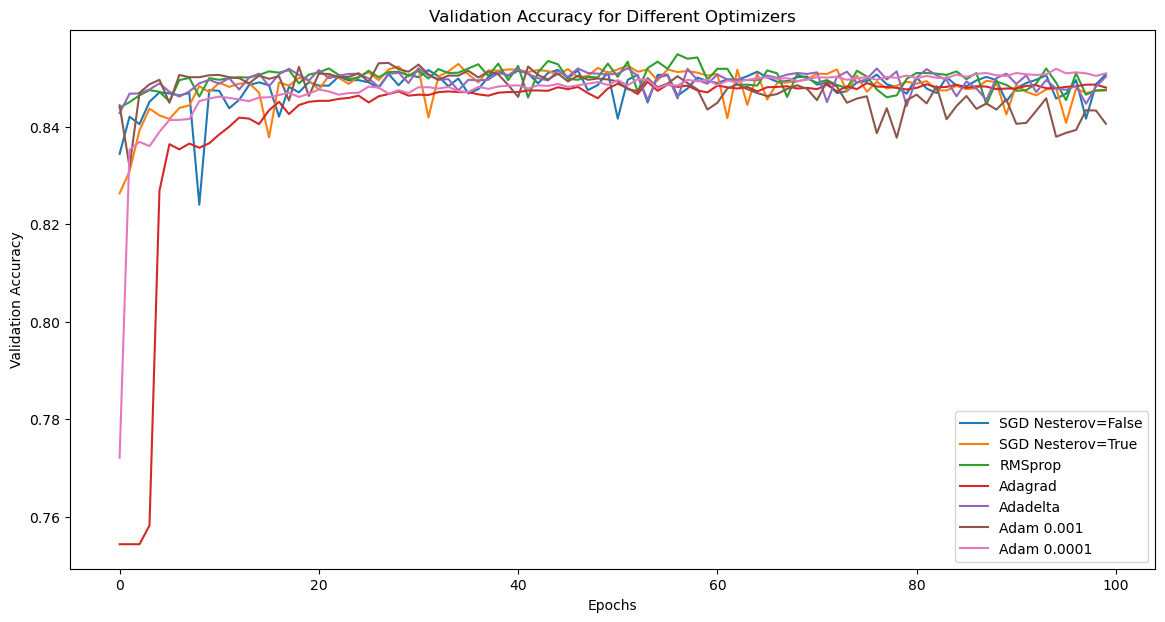

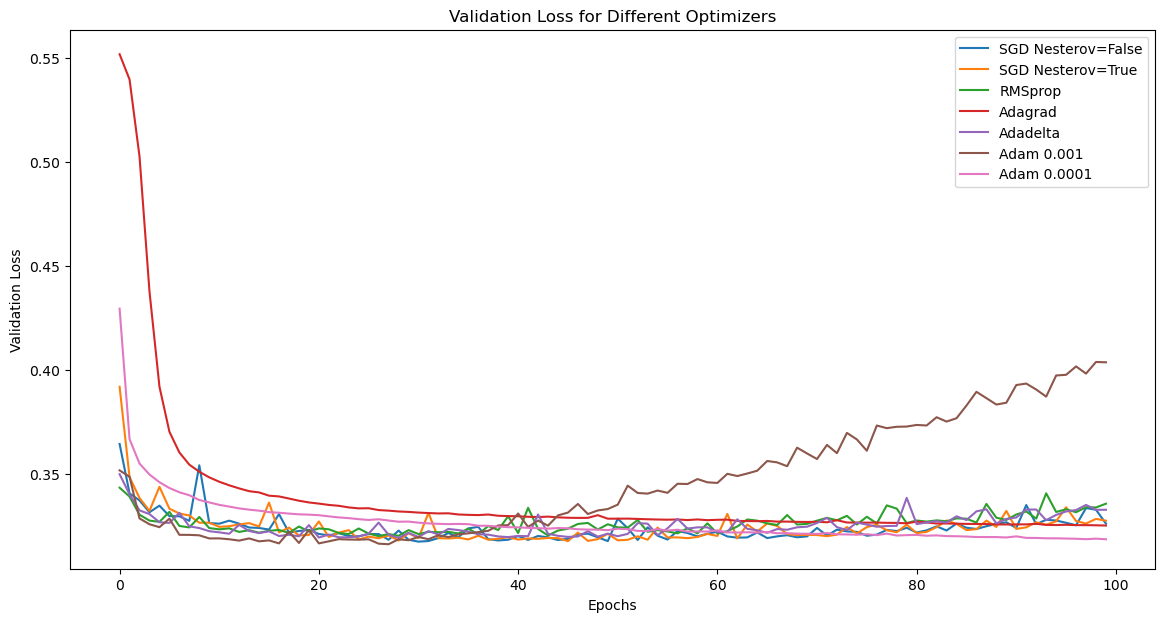

In [15]:
def plot_history(histories, title):
    plt.figure(figsize=(14, 7))
    for name, history in histories:
        plt.plot(history.history["val_accuracy"], label=name)
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.show()


histories = [
    ("SGD Nesterov=False", history_sgd_nesterov_false),
    ("SGD Nesterov=True", history_sgd_nesterov_true),
    ("RMSprop", history_rmsprop),
    ("Adagrad", history_adagrad),
    ("Adadelta", history_adadelta),
    ("Adam 0.001", history_adam_001),
    ("Adam 0.0001", history_adam_0001),
]

plot_history(histories, "Validation Accuracy for Different Optimizers")


def plot_loss(histories, title):
    plt.figure(figsize=(14, 7))
    for name, history in histories:
        plt.plot(history.history["val_loss"], label=name)
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Validation Loss")
    plt.legend()
    plt.show()


plot_loss(histories, "Validation Loss for Different Optimizers")